In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')
from sub_projects.ray_optimization.configuration import params_to_func
from ray_optim.plot import Plot
import torch
from matplotlib import pyplot as plt
from typing import List, Tuple

## Setup

In [80]:
samples_count = 4
z_count = 10
compensated = [torch.randn(z_count, 1000, 2) * 0.1 + 0.1 + 1.3 * i for i in range(samples_count)]
target = [torch.randn(z_count, 1000, 2) * 0.1 + 1.3 * i for i in range(samples_count)]
without_compensation = [torch.randn(z_count, 1000, 2) * 0.1 + 0.4 + 1.3 * i for i in range(samples_count)]

## Tests
### Footprint

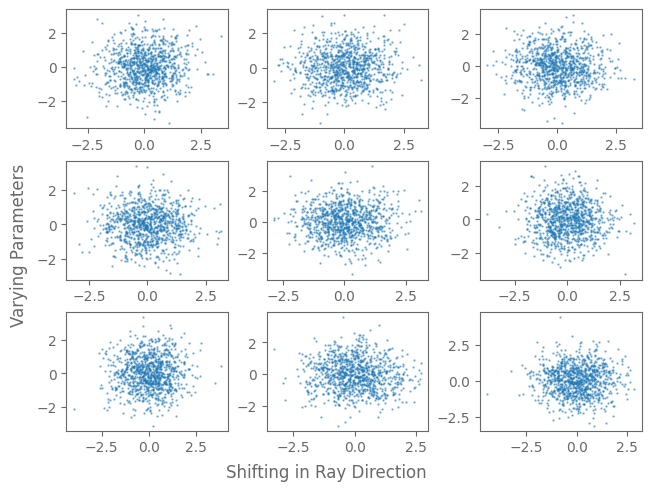

In [3]:
Plot.plot_data([torch.randn(3, 1000, 2) for i in range(3)])

### Fixed position

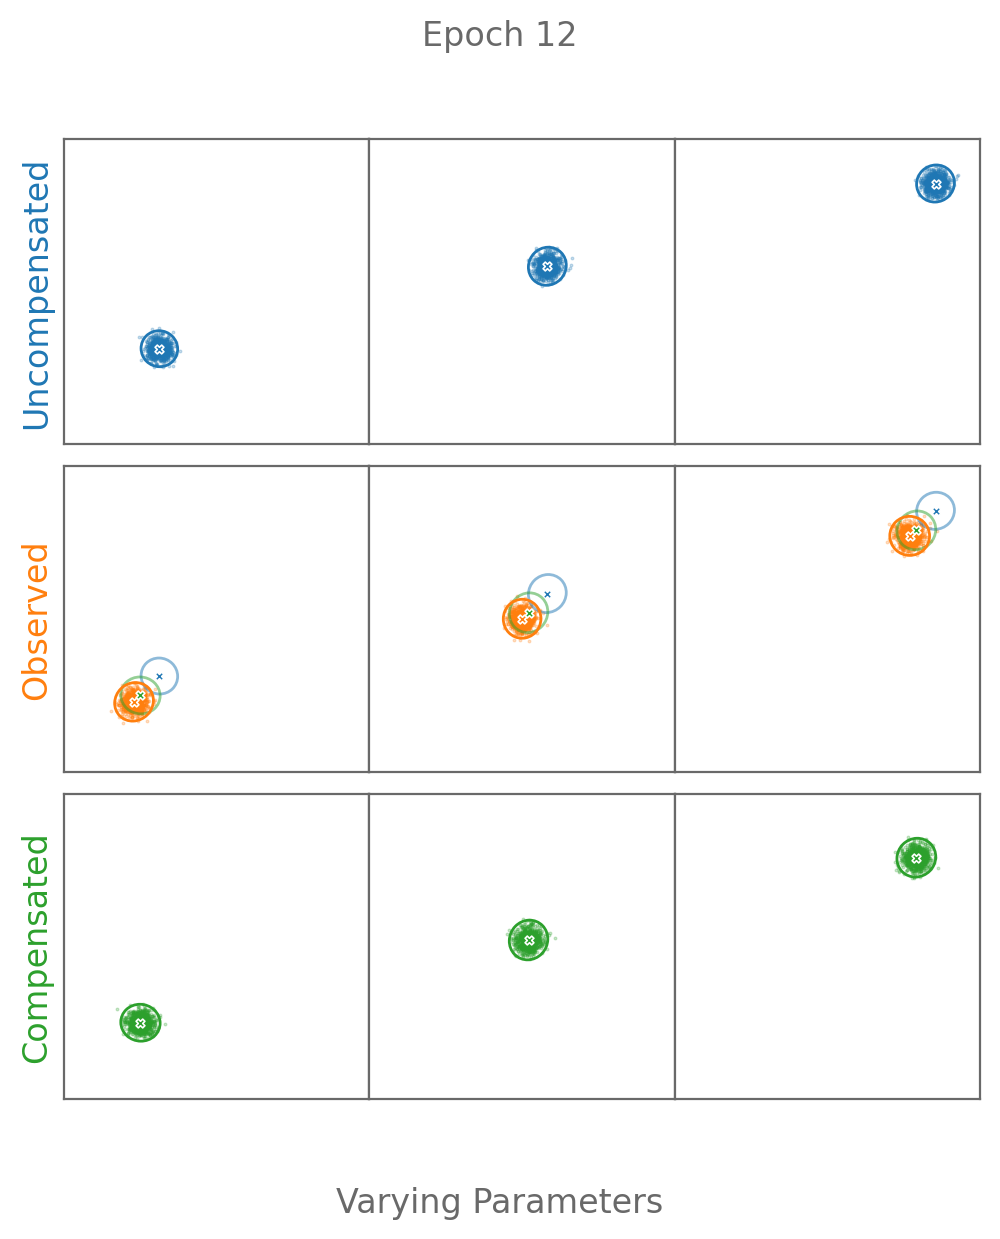

In [4]:
lims_x = (-2.0, 2.0)
lims_y = (-2.0, 2.0)
lims_x, lims_y = Plot.switch_lims_if_out_of_lim(target, lims_x=lims_x, lims_y=lims_y)
Plot.fixed_position_plot(
    compensated, target, without_compensation, lims_x, lims_y, epoch=12
)

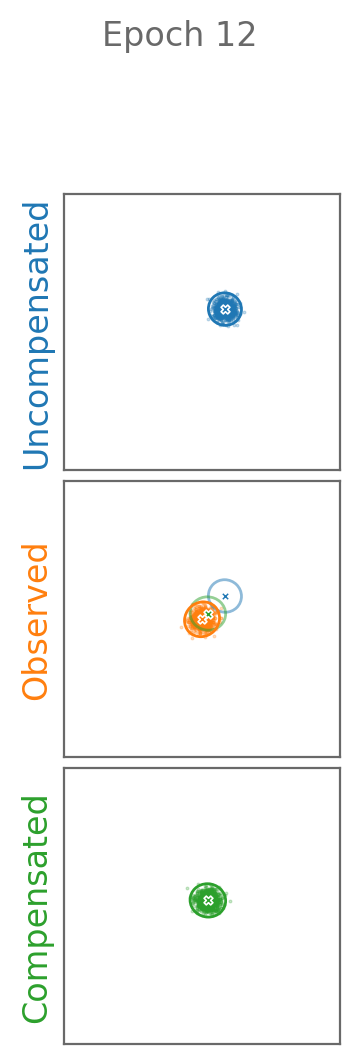

In [5]:
Plot.fixed_position_plot(
    compensated[:1], target[:1], without_compensation[:1], (-2.0, 2.0), (-2.0, 2.0), epoch=12
)

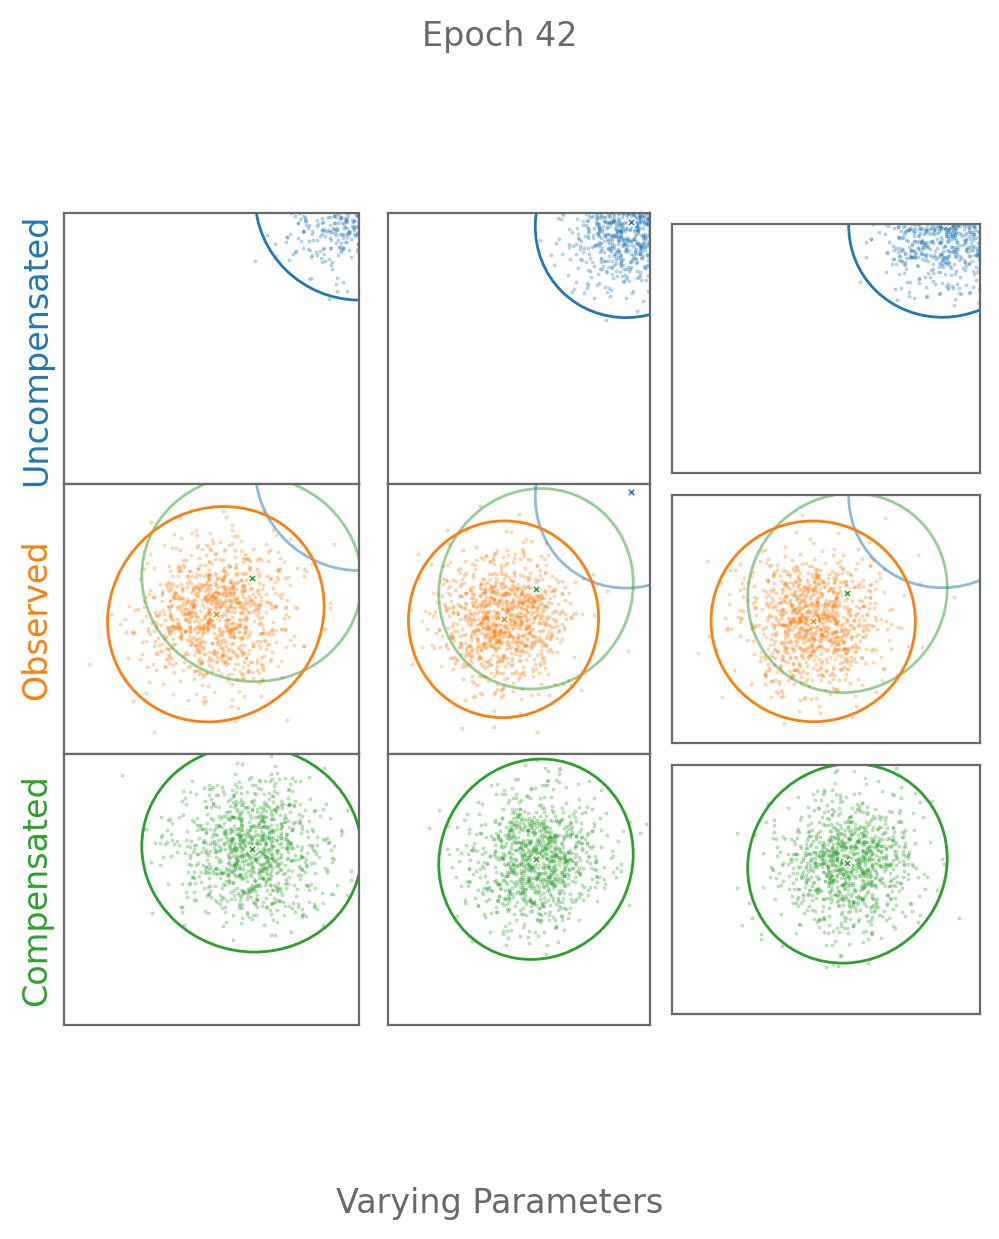

In [6]:
Plot.compensation_plot(
    compensated, target, without_compensation, epoch=42, covariance_ellipse=True
)

### Parameter comparison

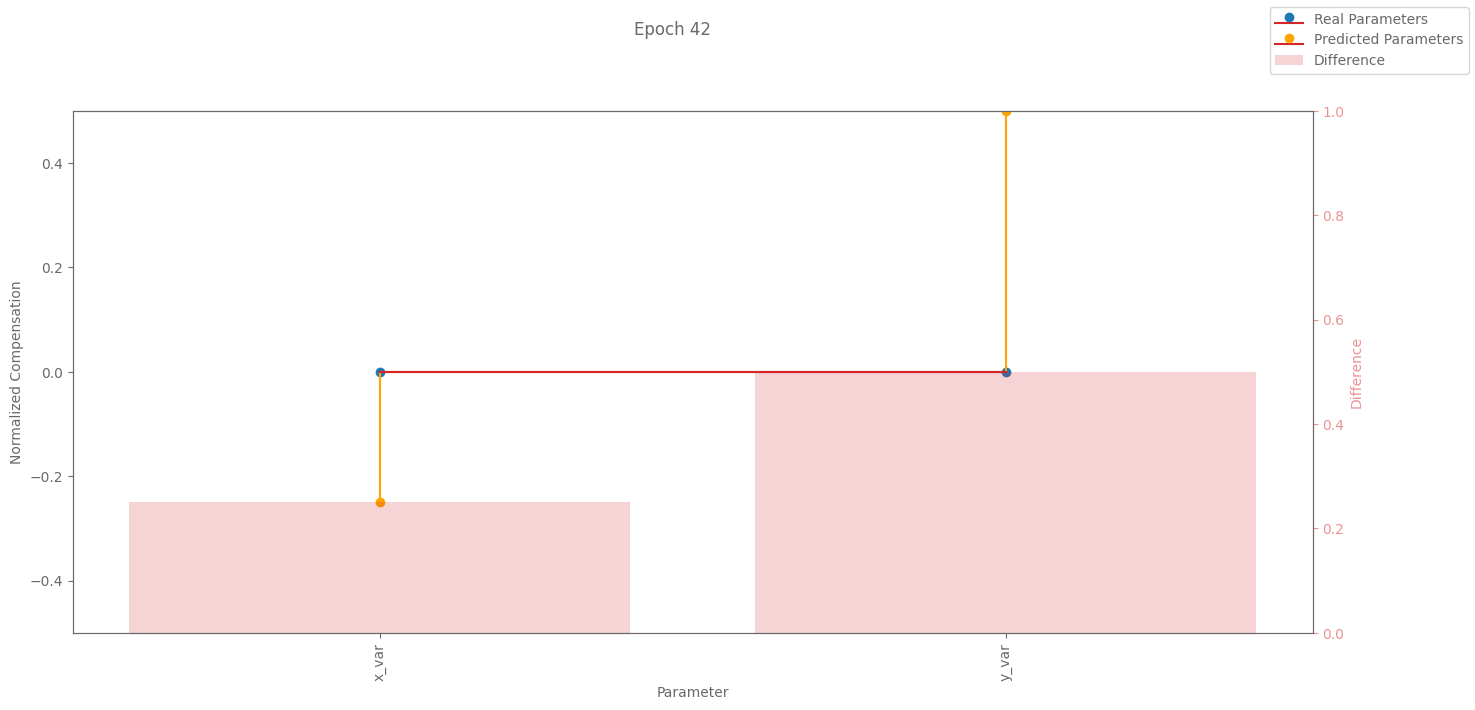

In [7]:

parameters = {
            "x_var": [-5., 5.],
            "y_var": [0., 10.],
            }
search_space = params_to_func(parameters)()
real_params = params_to_func({"x_var": 0, "y_var":5})()
predicted_params = params_to_func({"x_var": -2.5, "y_var":10.})()
Plot.plot_param_comparison(epoch=42, real_params=real_params, predicted_params=predicted_params, search_space=search_space)

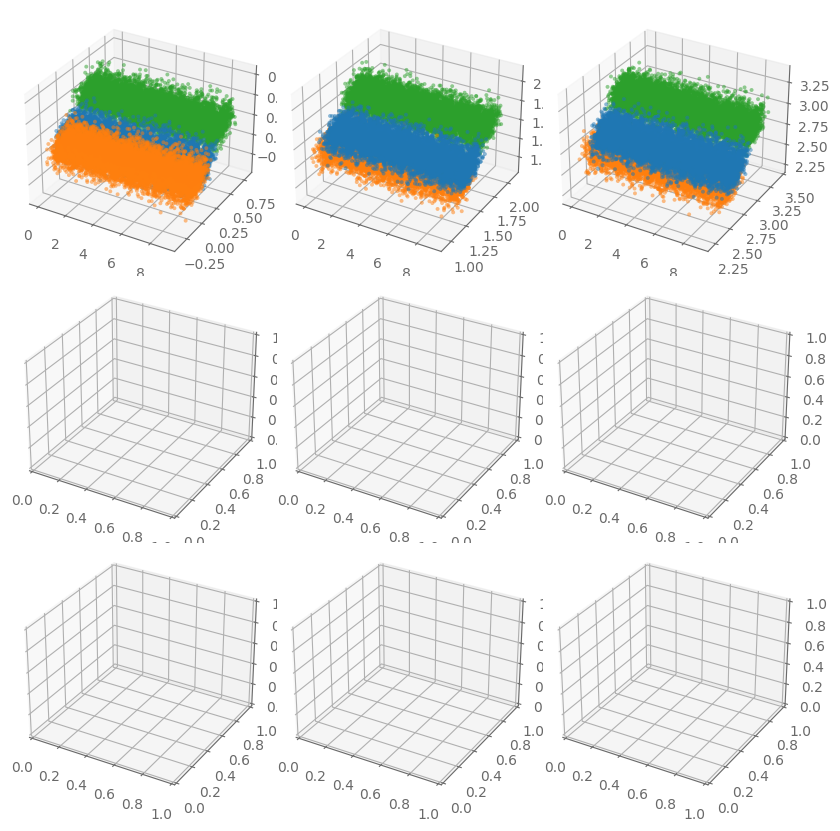

In [14]:

Plot.fancy_ray([compensated, target, without_compensation])

In [87]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# [[[3, 1000, 2] ... ], [[3, 1000, 2], ...]]
def fancy_ray(data: List[torch.Tensor]):
    rows = 1
    cols = len(data[0])
    specs = [[{"type": "scatter3d"} for _ in range(cols)] for _ in range(rows)]
    fig = make_subplots(rows=rows, cols=cols, specs=specs)

    for column_idx, column in enumerate(data[0]):
        y = torch.cat([value[column_idx].flatten(0, 1)[:, 0] for value in data])
        z = torch.cat([value[column_idx].flatten(0, 1)[:, 1] for value in data])
        x = torch.cat([torch.cat(
            [torch.ones_like(column[0, :, 0]) * i for i in range(column.shape[0])]
        ) for value in data])
        fig.add_trace(
            go.Scatter3d(x=x, y=y, z=z, mode="markers", opacity=0.5),
            row=1,
            col=column_idx + 1,
        )
        one_more_trace=dict(type='scatter3d',
                                   x=[1,5],
                                   y=[1,3],
                                   z=[4,5],
                                   mode='lines',
                                   line=dict(color='red'))
        fig.append_trace(one_more_trace, 1, 1)
        
    fig.update_traces(marker_size=2)
    return fig

fancy_ray([target, compensated])


ValueError: Trace type 'scatter' is not compatible with subplot type 'scene'
at grid position (1, 1)

See the docstring for the specs argument to plotly.subplots.make_subplots
for more information on subplot types

In [77]:
target[0].shape[0]
len(target)

3